In [1]:
import numpy as np
import math
import os
# import imageio
from barrier3d import Barrier3d
from cascade.outwasher_reorganized import Outwasher
from cascade.outwasher_reorganized import (plot_ElevAnimation, plot_DischargeAnimation, plot_SlopeAnimation, 
plot_Qs2Animation, plot_SedOutAnimation, plot_SedInAnimation)
import matplotlib.pyplot as plt
import imageio
import csv

In [2]:
with open(r"C:\Users\Lexi\Documents\Research\Outwasher\chris stuff\sound_data.txt", newline='') as csvfile:
    sound_data = list(csv.reader(csvfile))[0]
sound_data = [float(s) / 10 - 0.054 for s in sound_data]  # [dam MHW] Chris' sound elevations were in m MSL,
# so converted to NAVD88 then MHW and dam
sound_data = [s + 0.05 for s in sound_data]  # [dam MHW] just increasing the values
# setting all negative values to 0
sound_data = sound_data[20:]
# for index, value in enumerate(sound_data):
#     #     # smaller used 0.05
#     if value > 0.220:
#         sound_data[index] = 0.220
sound_data[0] = 0

<div class="alert alert-block alert-info"><b>Configuration:</b> Substep = 2, Cx = 10, Ki = 7.5x10$^{-3}$.
    Apply a fudge factor to the first row to simulate appropriate flows at the dune gaps: sum all cellular discharges through gaps and divide by the alongshore length. Multiply by a fudge factor (1)
</div>

In [3]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF1_fullhydro_Kie-3_substep2"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=2, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
discharge through gap: [6.10927907]
discharge through gap: [3.54393312]
discharge through gap: [2.48858982]
discharge through gap: [2.72445496]
discharge through gap: [8.16814998]
discharge through gap: [3.6606851]
discharge through gap: [1.96207037]
discharge through gap: [7.29543891]
discharge through gap: [6.20632221]
discharge through gap: [5.70984881]
discharge through gap: [4.71919419]
discharge through gap: [10.57351477]
avg first row discharge [5.07024104]
discharge at dune gaps after flow routing: [ 7.74413265  9.00444931  8.61593165  8.80931139  8.82811394  2.8316371
  2.25996981  2.46411638  2.4376498   2.62258104  2.38544041  5.20145711
  4.90097857  5.11517815  2.45353431  2.4416839   2.19840452  5.22634519
  2.67737659  2.21702641 10.97837694 10.8716257  10.77696372  2.48638779
  2.33463876  6.16148692  2.72677925  2.2316605   2.59796819  2.39170595
  2.1475561   9.97404182  9.85271667  9.95007057 10.13936542  2.53625275
  2.06022604  2.33669172  8.79455304 

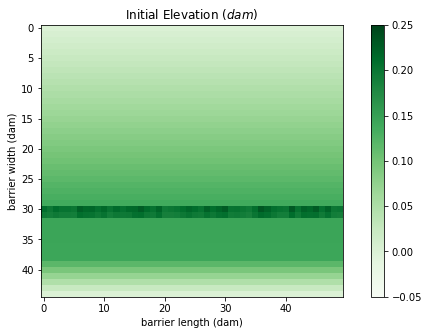

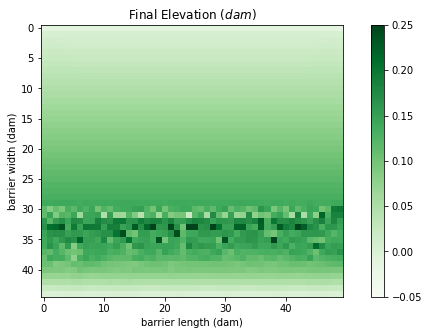

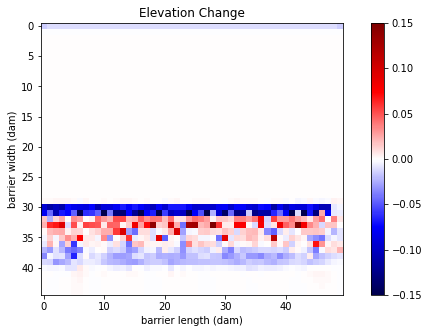

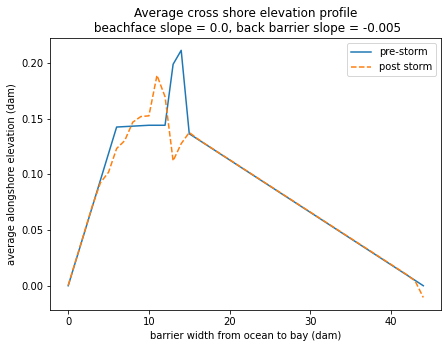

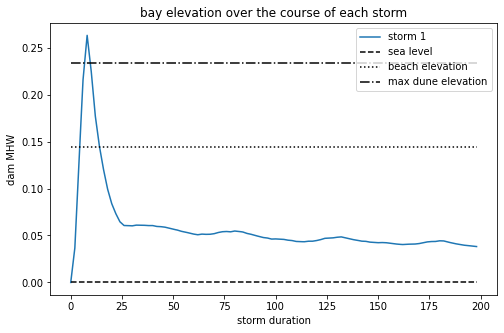

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [4]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(m_beach, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)

In [5]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
b3d.update()
b3d.update_dune_domain()

path = "C:/Users/Lexi/Documents/Research/Outwasher/Output/edgesedited_bay220limited/discharge_comp/"
runID = "no_dune_erosion_FF1_fullhydro_Kie-3_substep20"
newpath = path + runID + "/"
# storm series is year the storm occured, the bay elevation for every time step, and the duration of the storm
storm_series = [1, sound_data, len(sound_data)]

outwash = Outwasher(b3d, runID, path, substep=20, Cx=10, Ki=7.5E-3,)
discharge, elev_change, domain, qs_lost, slopes2, dictionary, qs2, storm_data, sedout, sedin, domain_array, OW_TS \
    = outwash.update(storm_series, b3d, fudge_fac=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
discharge through gap: [0.02823223]
discharge through gap: [0.59896554]
avg first row discharge [0.254539]
discharge at dune gaps after flow routing: [0.08207381 0.14534491 0.12584034 0.13554849 0.13649243 0.14215539
 0.11345623 0.12370491 0.12237622 0.13166024 0.11975518 0.13619284
 0.12110805 0.13186142 0.12317366 0.12257874 0.1103655  0.12560125
 0.13441111 0.11130036 0.14108054 0.13572136 0.13096909 0.12482299
 0.1172048  0.12554661 0.13689125 0.11203503 0.13042461 0.12006972
 0.10781278 0.13447268 0.12838185 0.13326926 0.14277234 0.12732634
 0.10342859 0.11730787 0.12993577 0.13551678 0.13839777 0.10666913
 0.1389234  0.1202177  0.12664605 0.11459831 0.140243   0.11848783
 0.14356958 0.08892159]
57
discharge through gap: [1.62346127]
discharge through gap: [0.39739868]
discharge through gap: [0.00345014]
discharge through 

discharge at dune gaps after flow routing: [12.56388675 15.1084775  14.32214093 14.71509291 14.75570864 14.97030684
 13.81734945 14.23302965 14.17954576 14.55265283 14.07322006 14.7381269
 14.12810607 14.56075097 14.21216329  4.92889232  4.43697345 14.33189079
 14.68499274 13.75082849 14.96079185 14.73773131 14.54719989 14.29760388
 13.99166844 14.33009455 14.77910889 13.77965545 14.52190775  4.8266291
  4.33122399 22.16409054 21.90408385 22.1011723  22.49944825  5.11538153
  4.15561499 15.67860451 16.20106294 16.42100529  5.56284224  4.28821035
 11.24076261 10.483281    5.09220265  4.60772553 16.22661381 15.34494243
  5.77424391  3.57606358]
65
discharge through gap: [10.97130401]
discharge through gap: [19.47230174]
discharge through gap: [13.35780164]
discharge through gap: [7.60354653]
discharge through gap: [12.94848647]
avg first row discharge [12.67836911]
discharge at dune gaps after flow routing: [15.0696412  18.22114701 17.24631429 17.73289723 17.78324    18.05264655
 16.6214

discharge at dune gaps after flow routing: [53.49049953 63.37933571 60.15072837 61.67232462 61.87035626 63.71425718
 58.14251335 59.77214969 59.75621928 61.18250668 59.21366033 62.1991925
 59.51082608 61.12746422 59.94726299 59.63155536 57.70554608 60.27271638
 62.26126181 57.6343047  63.42029733 61.69717479 60.99523317 60.06545783
 58.80655902 60.2558764  62.23086585 58.04813836 61.03680244 59.18328125
 57.21169505 62.59917928 60.4281231  61.14565681 63.99118139 60.71544225
 56.31776843 58.79586162 61.0414053  61.78406904 62.50614798 56.59948115
 65.46158042 58.8265615  59.65969905 58.25543566 64.43062807 59.02054092
 22.09599881 13.82112167]
76
discharge through gap: [43.59542914]
avg first row discharge [43.59542914]
discharge at dune gaps after flow routing: [58.53724201 69.28934052 65.72122356 67.37704154 67.60885069 69.9797255
 63.49450744 65.31027453 65.3580122  66.89812785 64.7203492  68.03575427
 65.07581209 66.82373874 65.57168476 65.17631625 63.06350143 65.89107285
 68.30261

discharge at dune gaps after flow routing: [ 53.83772168  62.07020319  57.46540718  56.813367    55.06910939
  84.11454661  50.82878675  55.11603596  58.98988263  60.26191133
  57.58700803  61.85112555  58.25905947  60.19851341  59.30157038
  58.13725008  54.99179978  57.3496974   64.26174479  47.44081572
  87.72405179  52.90941459  56.08464287  58.44253328  56.92180489
  59.27029227  61.99635301  56.503503    60.20855183  55.484302
  51.53622487  76.60349649  47.76678242  43.30728733 109.1002749
  46.11480488  48.34226128  56.9607103   59.04647961  58.42192717
  69.48921889  49.28576645  75.91499017  53.87227204  54.56342493
  54.20124909  73.69518722  59.54889817  17.01105854  11.5394125 ]
88
discharge through gap: [34.76175357]
avg first row discharge [34.76175357]
discharge at dune gaps after flow routing: [ 50.07728619  57.53461303  53.11688049  51.88316177  49.49679391
  82.35237364  45.94798915  50.42396006  54.6869351   55.90370391
  53.32579817  57.45331803  53.96787897  55.84

discharge at dune gaps after flow routing: [18.61634204 20.89339516 18.73691538 16.97840351 14.75772105 39.7413094
 14.16980003 16.57515816 19.76321761 20.40718999 19.13254303 21.27441272
 19.44215282 20.4628849  20.06388094 19.44607405 17.62654962 17.92415055
 22.15745313 13.13284168 39.31551381 14.79627059 17.38158877 19.4696357
 18.8401916  19.96693957 21.32952598 18.70459626 20.4011156   4.72540349
  2.20645101 46.07983241 20.55774965 20.55774965 48.07077505  2.88802729
  3.59735917 21.19077925 20.21367442 17.51448092 23.94531279  0.
 28.85936094 11.4624684  12.88220376 14.25533747 24.08729052 17.28603358
  5.54085957  3.89070478]
99
discharge through gap: [10.53478266]
discharge through gap: [10.55422964]
discharge through gap: [18.28201434]
discharge through gap: [12.31120867]
discharge through gap: [6.74160001]
discharge through gap: [11.91299127]
avg first row discharge [11.55896218]
discharge at dune gaps after flow routing: [16.26942909 18.16566871 16.32647965 14.84561241 12.

discharge at dune gaps after flow routing: [4.28305585 1.72407305 1.29811967 4.33334831 3.910435   5.37253531
 0.43558822 0.89526709 1.50962374 1.63805689 1.38845303 1.81322465
 1.4498578  1.65209547 1.57429283 1.44537312 1.08378394 1.1290855
 2.03169535 0.22424476 9.16376207 4.42687882 4.9254348  1.45401528
 1.3331467  1.55842661 1.81698634 1.30563527 1.63799132 0.89633169
 0.41794415 8.09707419 3.19925564 3.19925564 8.49819425 0.54598518
 0.67787102 1.31098128 3.52327955 2.99917084 4.40027402 0.
 4.05858897 0.5118087  0.77624768 1.03327367 2.973699   1.63184059
 1.05271872 0.74118703]
107
discharge through gap: [5.0825003]
discharge through gap: [1.91814284]
discharge through gap: [0.00611293]
discharge through gap: [2.01931703]
discharge through gap: [0.36230635]
discharge through gap: [0.96750921]
discharge through gap: [4.09705744]
discharge through gap: [1.46430011]
discharge through gap: [2.72584341]
discharge through gap: [2.22406017]
discharge through gap: [0.85889042]
dischar

858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
10

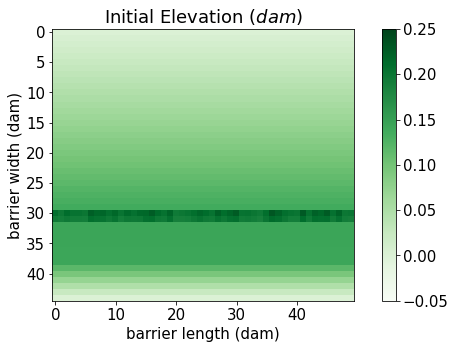

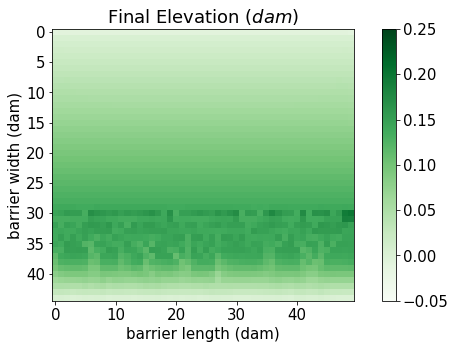

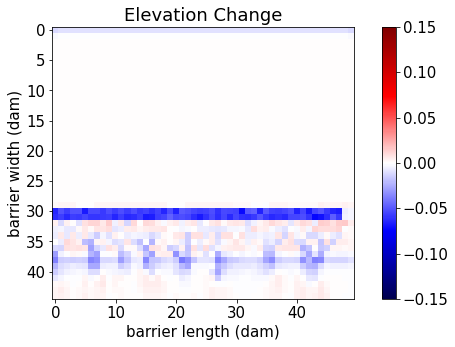

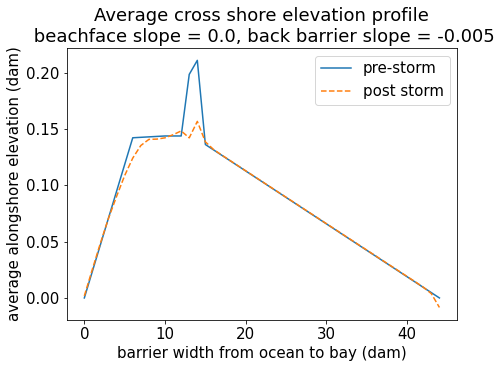

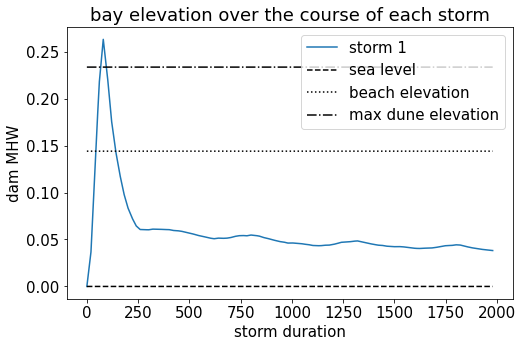

[ * elevation GIF successfully generated * ]

[ * discharge GIF successfully generated * ]

[ * slope GIF successfully generated * ]

[ * SedOut GIF successfully generated * ]

[ * SedIn GIF successfully generated * ]


In [6]:
initial_domain = domain_array[0]
final_domain = domain_array[1]

plt.rcParams['figure.figsize'] = (10,5)

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    initial_domain,
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
fig1.colorbar(mat)
ax1.set_title("Initial Elevation $(dam)$")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :],
    cmap="Greens",
    vmin=-0.05, vmax=0.25,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Elevation after storm {0} $(dam)$".format(n + 1))
ax2.set_title("Final Elevation $(dam)$")
plt.gca().xaxis.tick_bottom()
fig2.colorbar(mat2)
fig2.savefig(newpath + "final_domain", facecolor='w')

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change,
    # origin="upper",
    cmap="seismic",
    vmin=-0.15, vmax=0.15,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
fig3.colorbar(mat3)
fig3.savefig(newpath + "elev_change_domain", facecolor='w')

plt.rcParams['figure.figsize'] = (7,5)


### AVERAGE ELEVATION PLOT------------------------------------------------------------------------------------------------------
# plotting pre-storm cross section for row 21 (a gap where overwash occurs)
cross_section = np.mean(initial_domain, 1)
cross_section = np.flip(cross_section)
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(range(len(initial_domain)), cross_section, label="pre-storm")


# plotting post-storm cross section
m_beach = 0.0004
cross_section2 = np.mean(final_domain, 1)
cross_section2 = np.flip(cross_section2)
ax4.plot(range(len(final_domain)), cross_section2, label="post storm", linestyle="dashed")
# dune_gap_el = np.flip(full_domain[:, 21])
# ax4.plot(range(len(full_domain)), dune_gap_el, label="dune gap (21) post", linestyle="dashed")
ax4.set_xlabel("barrier width from ocean to bay (dam)")
ax4.set_ylabel("average alongshore elevation (dam)")
# ax4.set_title("Cross shore elevation profile for col 21\n "
#               "beachface slope = {0}, back barrier slope = {1}".format(round(m_beachface, 3), round(Si, 3)))
ax4.set_title("Average cross shore elevation profile\n "
              "beachface slope = {0}, back barrier slope = {1}".format(round(m_beach, 3),
                                                                       round(outwash._Si, 3)))
ax4.legend()
plt.show()
# plt.savefig(newpath + "cross_shore_21")
fig4.savefig(newpath + "avg_cross_shore", facecolor='w')

### HYDROGRAPH------------------------------------------------------------------------------------------------------------------
# plot the bay elevation throughout each storm with sea level and beach elevation references
plt.rcParams['figure.figsize'] = (8,5)

numstorm = storm_series[0]
x = range(0, storm_series[2])
sea_level_line = outwash._sea_level * np.ones(len(x))
beach_elev_line = outwash._beach_elev * np.ones(len(x))
dune_elev_line = max(outwash._dune_crest + outwash._berm_el) * np.ones(len(x))

for n in range(numstorm):
    fig5 = plt.figure()
    ax5 = fig5.add_subplot(111)
    ax5.plot(x, storm_series[1], label='storm {0}'.format(n + 1))
    # if we have multiple storms, will only need to plot these once
    ax5.plot(x, sea_level_line, 'k', linestyle='dashed', label='sea level')
    ax5.plot(x, beach_elev_line, 'k', linestyle='dotted', label='beach elevation')
    ax5.plot(x, dune_elev_line, 'k', linestyle='dashdot', label='max dune elevation')
    ax5.set_xlabel("storm duration")
    ax5.set_ylabel("dam MHW")
    ax5.set_title("bay elevation over the course of each storm")
    ax5.legend()
    plt.show()
    fig5.savefig(newpath + "hydrograph", facecolor='w')
    plt.close()
    
### GIFS------------------------------------------------------------------------------------------------------------------------

start = OW_TS[0]
stop = OW_TS[-1]
dir = newpath
plot_ElevAnimation(elev_change, dir, start, stop)
plot_DischargeAnimation(discharge, dir, start, stop)
plot_SlopeAnimation(slopes2, dir, start, stop)
# plot_Qs2Animation(qs2, dir, TMAX)
plot_SedOutAnimation(sedout, dir, start, stop)
plot_SedInAnimation(sedin, dir, start, stop)
# time_step = [0]
# plot_ModelTransects(b3d, time_step)